# Real-world Data Wrangling

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Using cached six-1.17.0-


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import kaggle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

#### **Dataset 1**

Type: *CSV File*

Method: *First dataset (netflix_titles.csv) is gathered using kaggle api* 

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


Dataset variables:

*   *show_id: Unique identifier for every movie or TV show.*
*   *type: Identifier distinguishing between a movie and a TV show.*
*   *title: Title of the movie or TV show.*
*   *director: Director of the movie. Missing for some entries, especially TV shows.*
*   *cast: Actors involved in the movie or show. Some entries are missing this information.*
*   *country: Country where the movie or show was produced.*
*   *date_added: Date the title was added to Netflix.
*   *release_year: Actual release year of the movie or show.*
*   *rating: TV rating of the movie or show.*
*   *duration: Total duration in minutes or number of seasons.*
*   *listed_in: Genre categories for the movie or show.*
*   *description: Brief summary of the movie or show.*


In [6]:
kaggle.api.dataset_download_files('shivamb/netflix-shows', path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows


#### Dataset 2

Type: *CSV File* 
Method: *Second dataset (movies_metadata.csv) is downloaded manually From kaggle website*

The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

Dataset variables:

*   *adult: Boolean indicating if the movie is for adults.*
*   *belongs_to_collection: Details if the movie is part of a collection.*
*   *budget: Budget of the movie.*
*   *genres: List of genres the movie belongs to.*
*   *id: Unique identifier of the movie.*
*   *imdb_id: IMDb identifier for the movie.*
*   *original_language: The original language in which the movie was made.*
*   *original_title: The original title of the movie.*
*   *overview: A brief summary of the movie.*
*   *popularity: Popularity score of the movie.*
*   *poster_path: URL to the poster image of the movie.*
*   *production_companies: List of production companies involved in the movie.*
*   *production_countries: List of countries where the movie was produced.*
*   *revenue: Revenue generated by the movie.*
*   *release_date: Release date of the movie.*
*   *runtime: Running time of the movie in minutes.*
*   *spoken_languages: Languages spoken in the movie.*
*   *status: The release status of the movie (e.g., Released, Rumored).*
*   *tagline: Tagline of the movie.*
*   *title: Title of the movie.*
*   *video: Boolean indicating if there is a video clip available for the movie.*
*   *vote_average: Average rating of the movie.*
*   *vote_count: Count of votes the movie has received.*

## Dataset 1

In [9]:
# Loading the Netflix dataset
netflix_data = pd.read_csv('data/netflix_titles.csv')

Inspect the first and last few rows of the dataset along with a few random samples

from the results we can see missing data in the director, cast, country column, consistant format for the date, in the duration column we can see inconsistant data for the duration (some show the season while others show the time of the movie/episode) 

In [10]:
# Display the first few rows of the Netflix dataset
print("\nnetflix_data head\n")
print(netflix_data.head())

print("\nnetflix_data tail\n")
print(netflix_data.tail())

print("\nnetflix_data random sample of 5 records\n")
print(netflix_data.sample(5))


netflix_data head

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Septem

Dataset shape and column names 

In [11]:
# Print shape and column names of datasets
print(netflix_data.shape, netflix_data.columns)

(8807, 12) Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Data Frame summary

In [12]:
# data types and number of entries
print("netflix_data DataFrame info\n")
netflix_data.info()

print("netflix_data statistics\n")

print(netflix_data.describe())

netflix_data DataFrame info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
netflix_data statistics

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


### Quality Issue 1:

we can see missing values in director, cast, country, and date_added columns, loss of critical values could severly affect the analysis (quality issue)   

In [13]:
# missing values in Netflix
print(netflix_data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


<Figure size 1200x800 with 0 Axes>

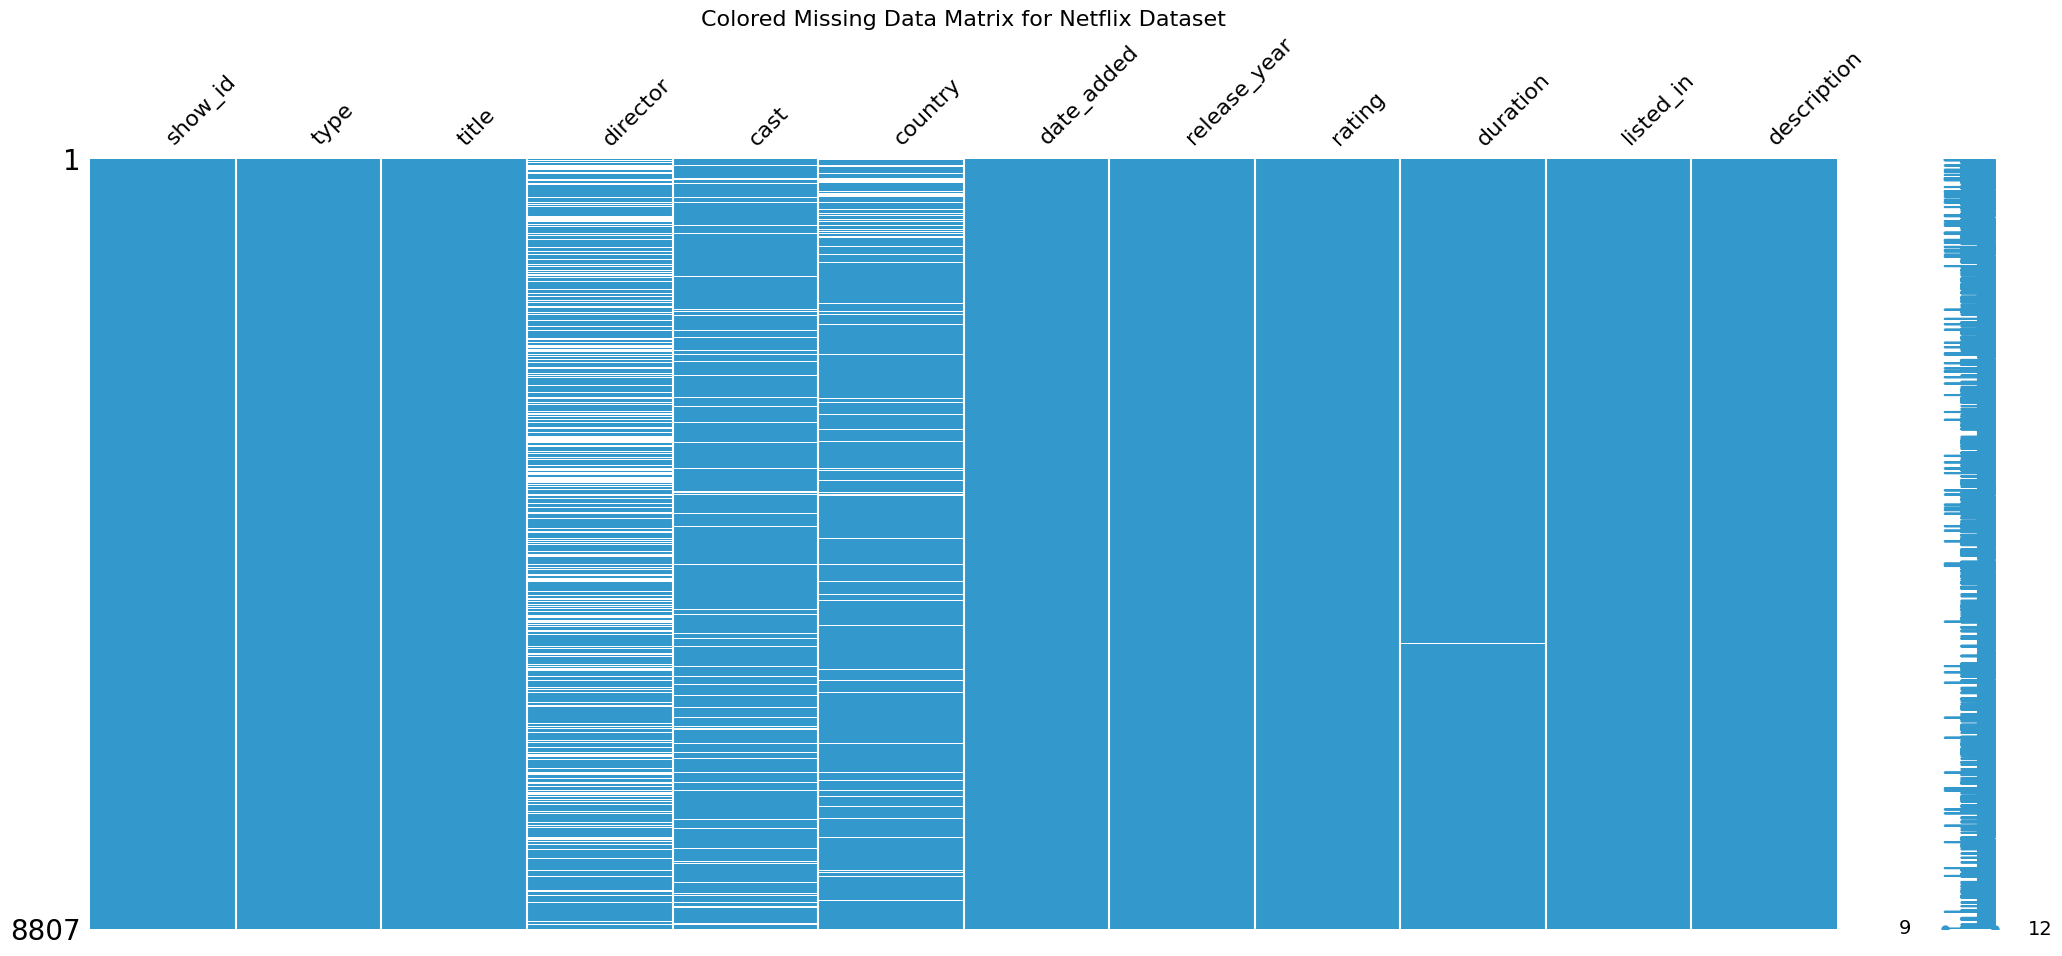

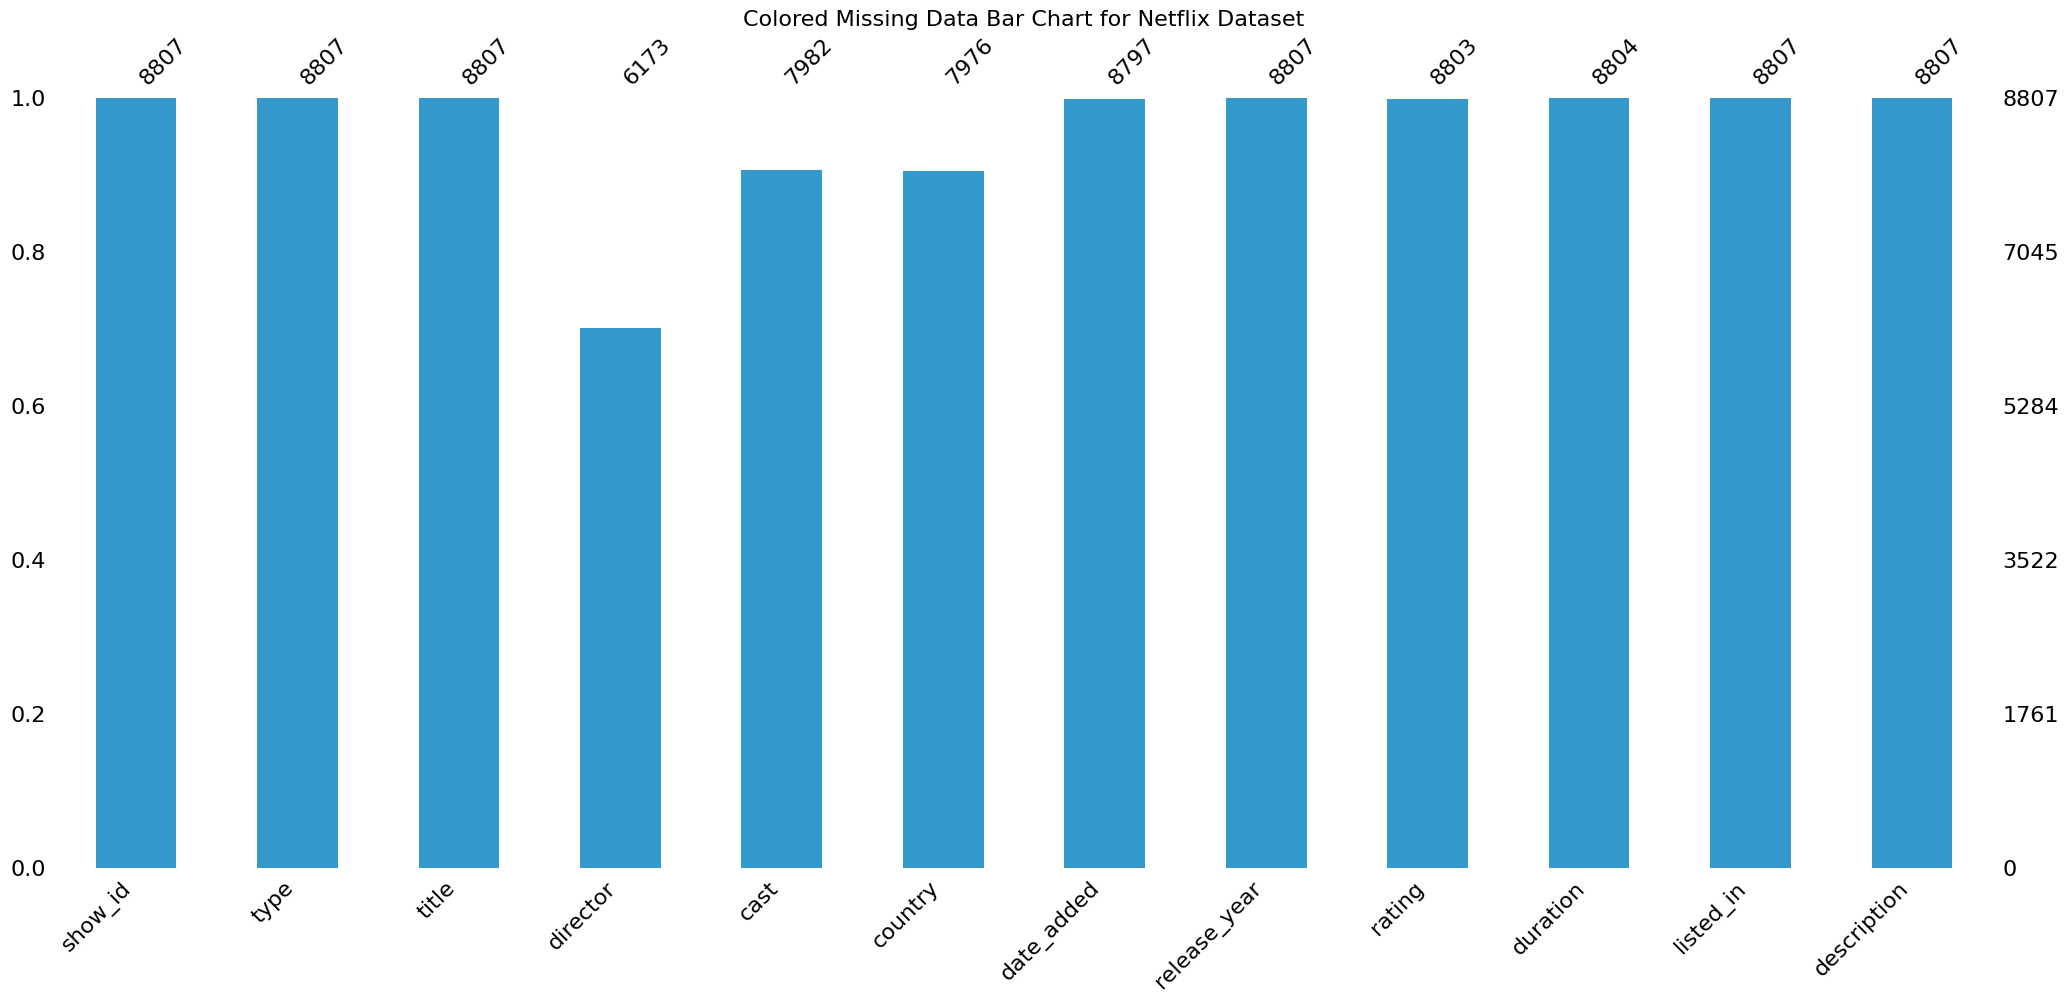

In [14]:
plt.figure(figsize=(12, 8))
# Using a custom RGB tuple for the missing data visualization (values range from 0 to 1)
msno.matrix(netflix_data, color=(0.2, 0.6, 0.8), sparkline=True)
plt.title("Colored Missing Data Matrix for Netflix Dataset", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
msno.bar(netflix_data, color=(0.2, 0.6, 0.8))
plt.title("Colored Missing Data Bar Chart for Netflix Dataset", fontsize=16)
plt.show()


### Quality Issue 2:

the rating column mostly contains tv ratings but there is a few numeric values, as shown below, most likely misentered data intended for duration (quality issue)

In [15]:
# Value counts to see distribution of categories
print(netflix_data['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


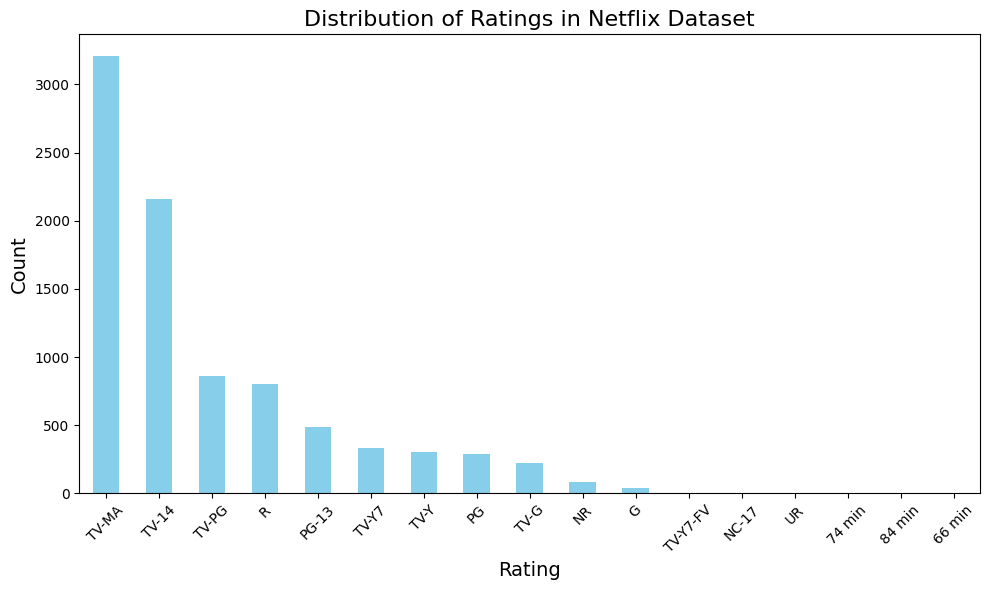

In [16]:
rating_counts = netflix_data['rating'].value_counts()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Ratings in Netflix Dataset", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tidiness Issue 1:

as shown the date format is consistant, but its better to be converted into a datetime type instead of a string (tidiness issue)

In [17]:
print(netflix_data['date_added'].value_counts())

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64


### Tidiness Issue 2:

the column has mixed formats (tidiness issue)

In [18]:
print(netflix_data['duration'].value_counts())

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64


no duplicated rows

In [19]:
print(netflix_data.duplicated().sum())

0


In [20]:
# Check for unusual entries in the 'release_year'
print(netflix_data['release_year'].unique())

[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]


the data is within the expeted range

In [21]:
# Check for accuracy issues by examining outliers in 'release_year'
print(netflix_data['release_year'].describe())

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


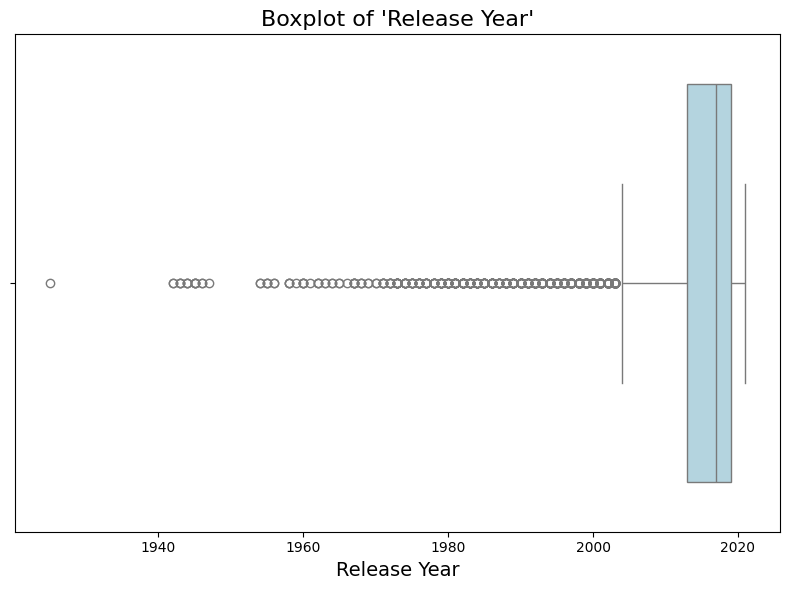

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=netflix_data['release_year'], color="lightblue")
plt.title("Boxplot of 'Release Year'", fontsize=16)
plt.xlabel("Release Year", fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
# Validate data types for the Netflix dataset
print(netflix_data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


check for the uniqness of the id (for merging the datasets)

In [24]:
print(netflix_data['show_id'].is_unique)

True


C:\Users\USER\AppData\Local\Temp\ipykernel_11712\3772392626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, x='type', palette='pastel')


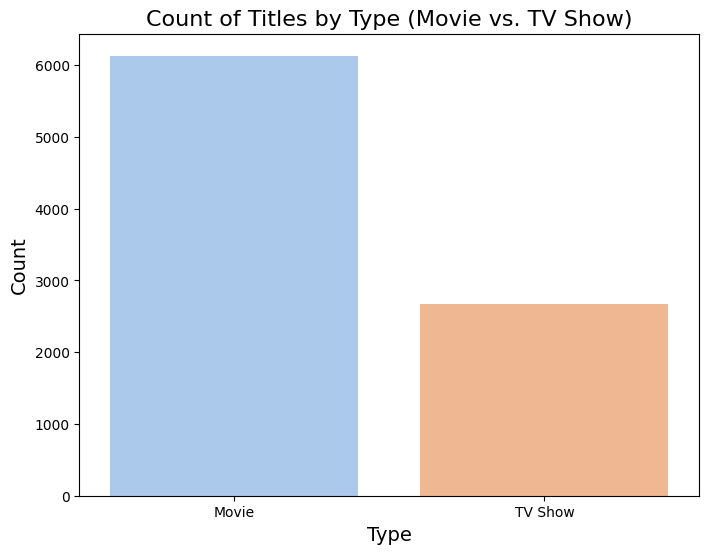

In [25]:
# (Movie vs. TV Show)
plt.figure(figsize=(8, 6))
sns.countplot(data=netflix_data, x='type', palette='pastel')
plt.title("Count of Titles by Type (Movie vs. TV Show)", fontsize=16)
plt.xlabel("Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

## Dataset 2

In [26]:
# Loading the MovieLens metadata
movies_metadata = pd.read_csv('data/movies_metadata.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_11712\2336556114.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('data/movies_metadata.csv')


we can see a few columns with missing data (quality issue)

### Tidiness Issue 1:

columns such as belongs_to_collection and genres are stored as string representations of lists (tidiness issue)

In [27]:
# Display the first few rows of the MovieLens dataset
print("movies_metadata head\n")
print(movies_metadata.head())

print("movies_metadata tail\n")
print(movies_metadata.tail())

print("movies_metadata random sample of 5 records\n")
print(movies_metadata.sample(5))

movies_metadata head

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   88

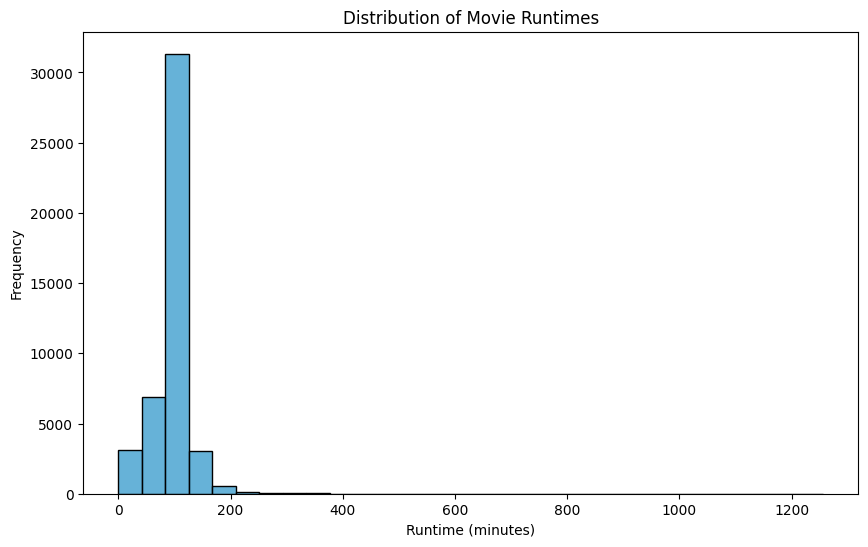

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_metadata['runtime'], bins=30, color=(0.2, 0.6, 0.8))
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.show()

as shown there isn't a corelation between runtime and revenue 

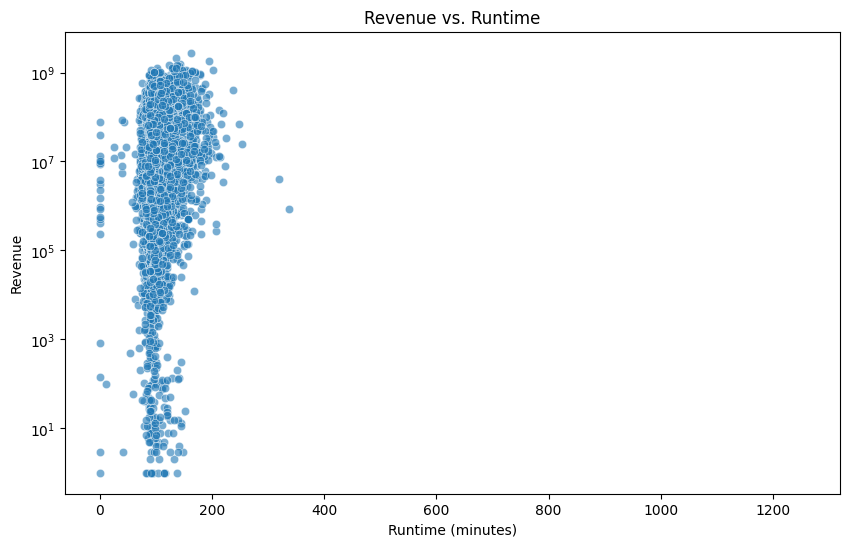

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='revenue', data=movies_metadata, alpha=0.6)
plt.title("Revenue vs. Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Revenue")
plt.yscale('log')  # Use log scale if revenue values span a wide range
plt.show()

### Quality Issue 1:

as shown 19 columns have missing data (quality issue)

In [30]:
# missing values in MovieLens
print(movies_metadata.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


<Figure size 1200x800 with 0 Axes>

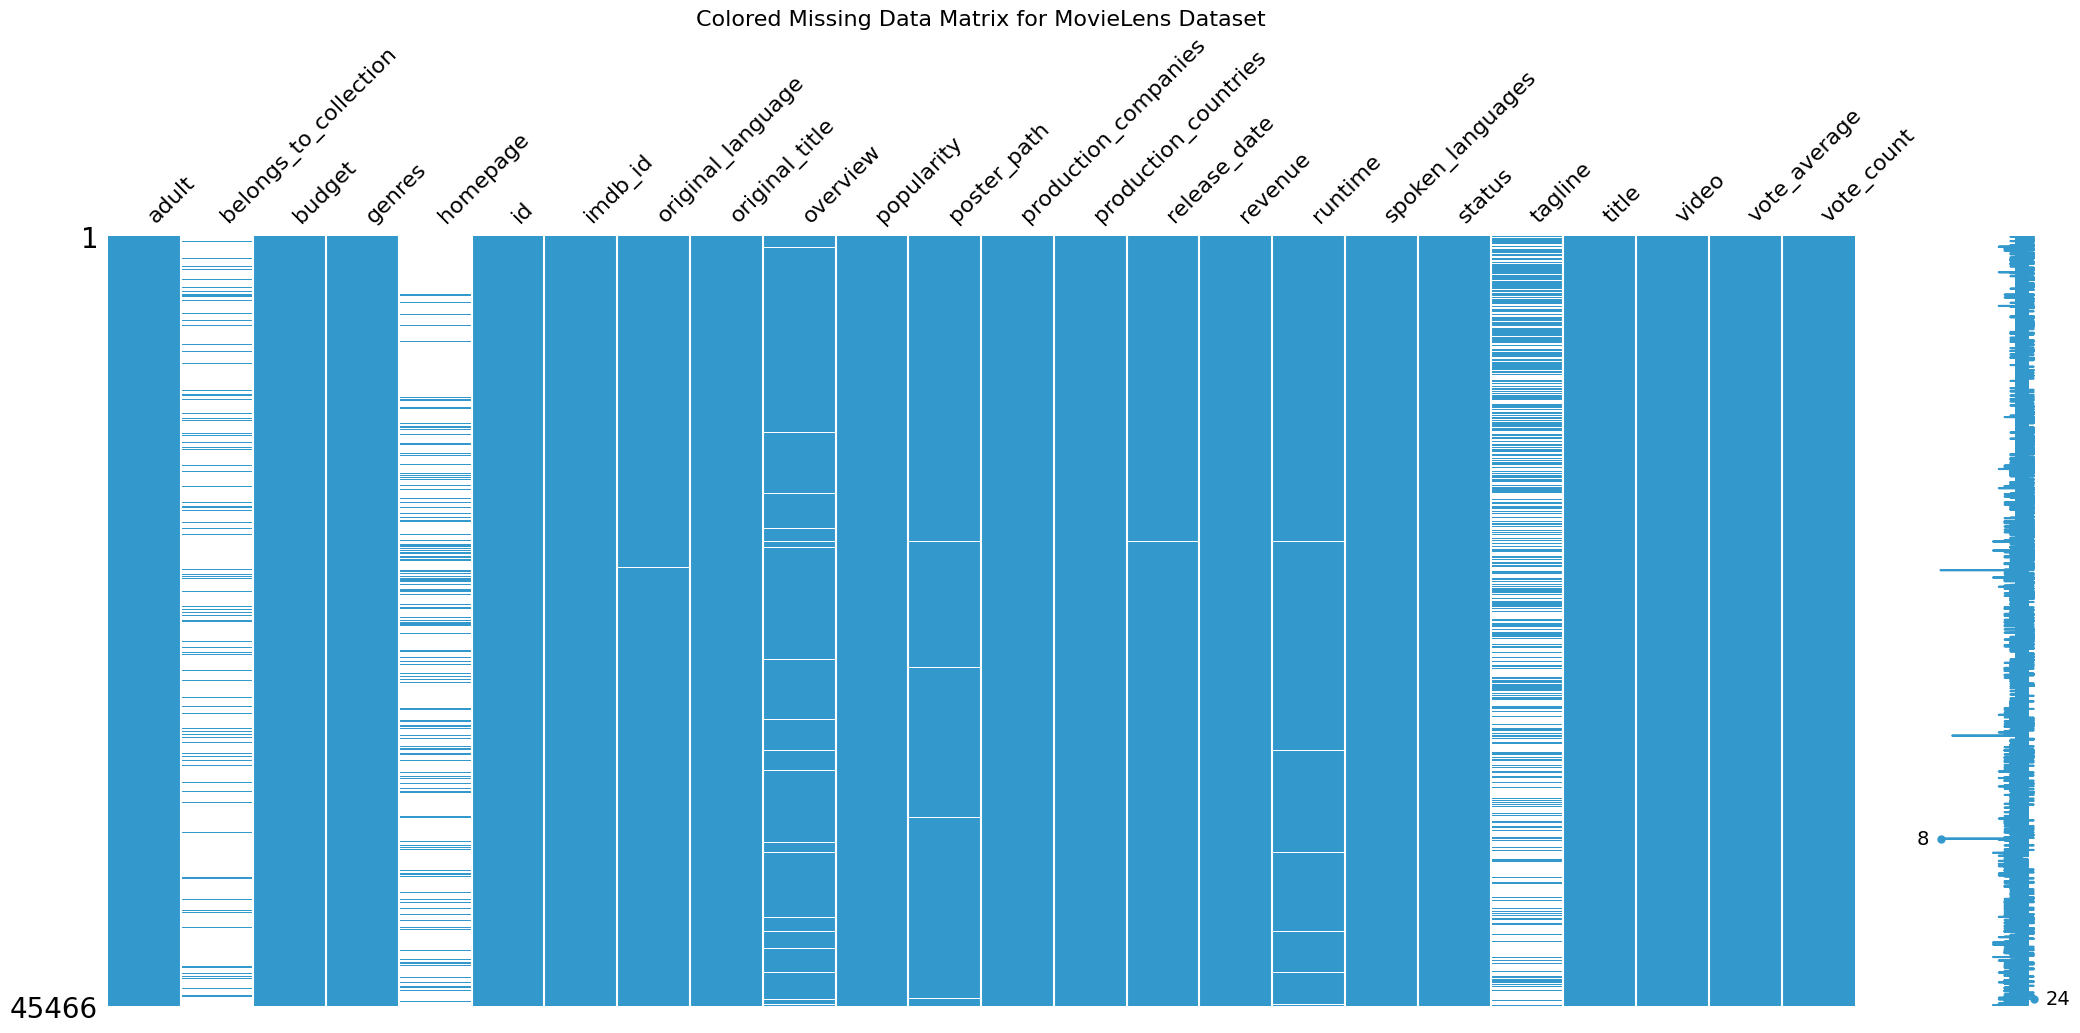

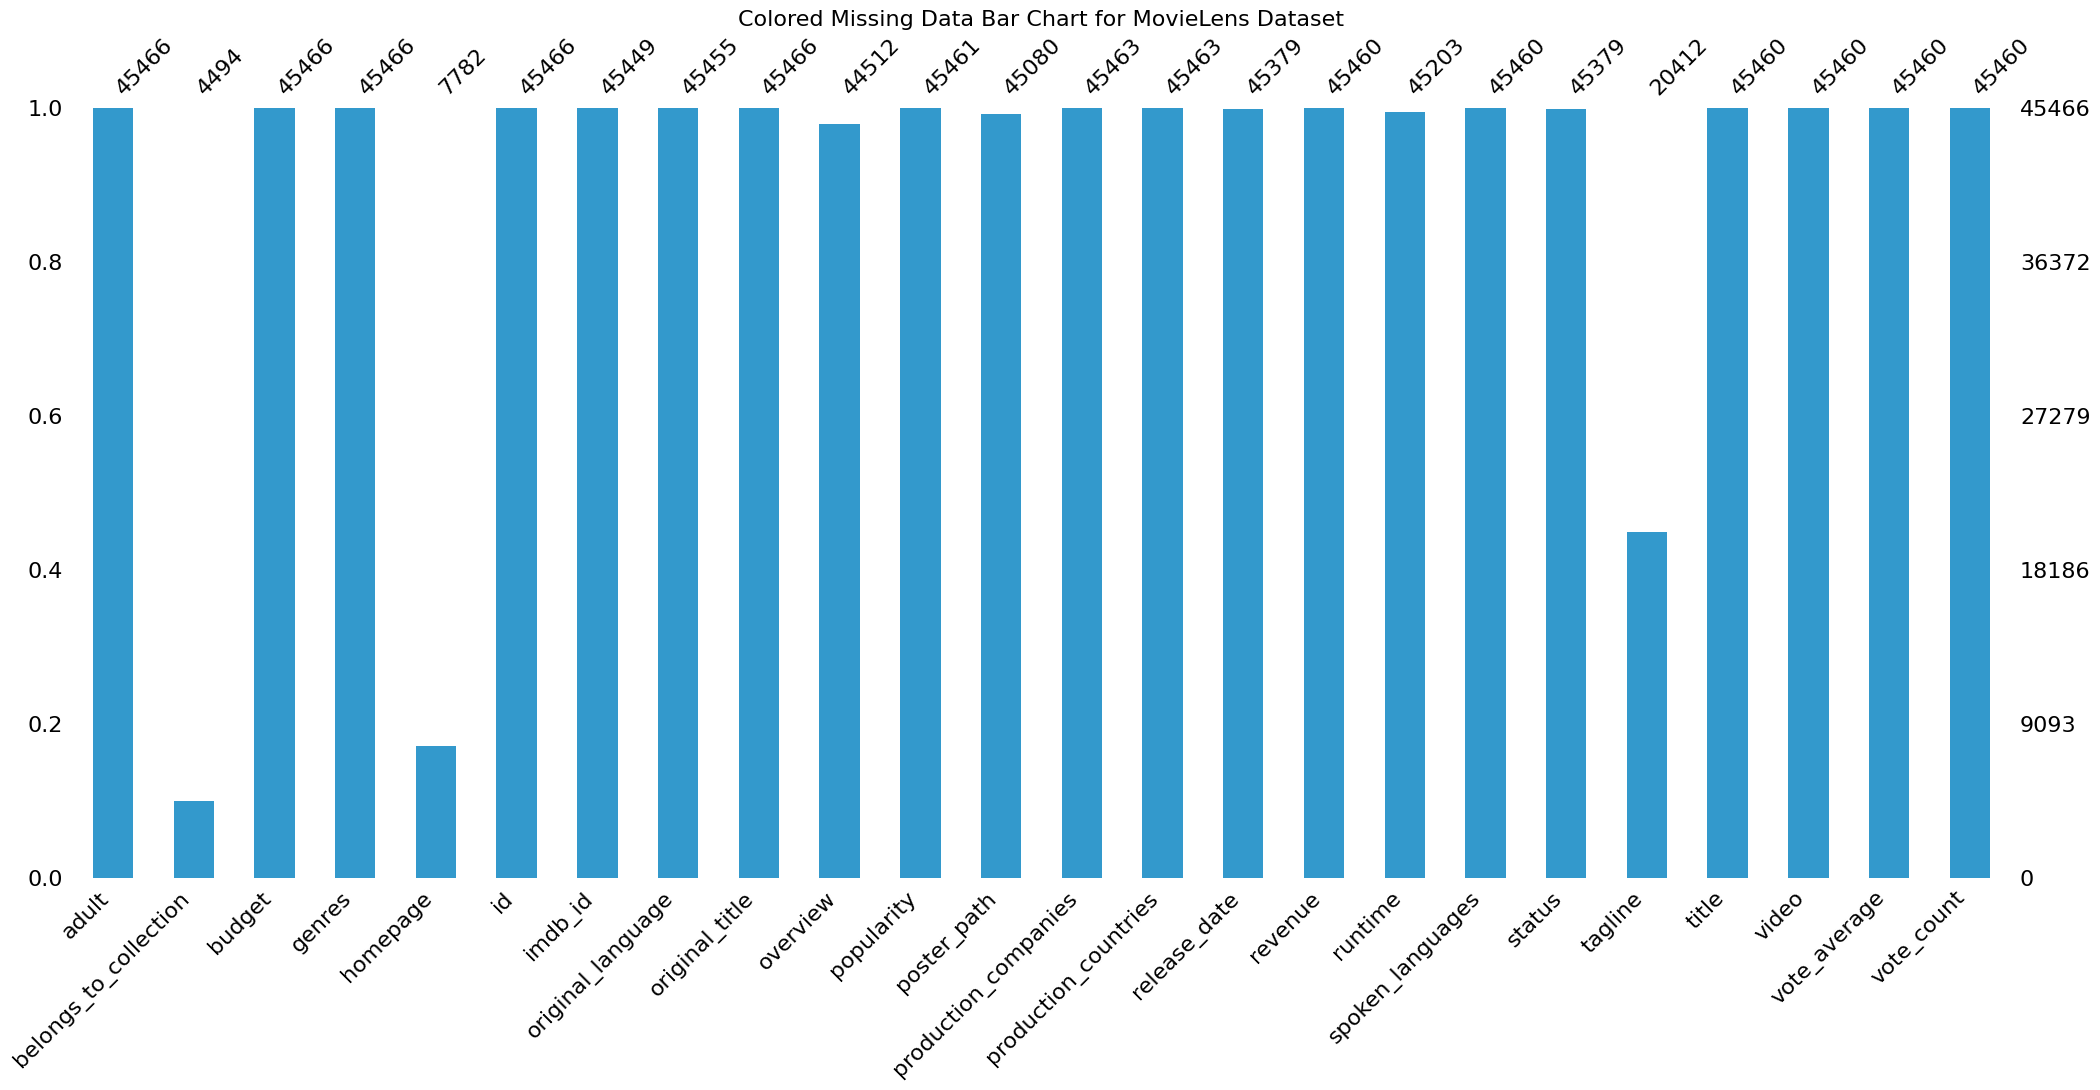

In [31]:
plt.figure(figsize=(12, 8))
# Using a custom RGB tuple for the missing data visualization (values range from 0 to 1)
msno.matrix(movies_metadata, color=(0.2, 0.6, 0.8), sparkline=True)
plt.title("Colored Missing Data Matrix for MovieLens Dataset", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
msno.bar(movies_metadata, color=(0.2, 0.6, 0.8))
plt.title("Colored Missing Data Bar Chart for MovieLens Dataset", fontsize=16)
plt.show()


### Quality Issue 2:

the adult column is expected to have boolean values (true and false) only but we can see unexpected entries as follows (quality issue)

In [32]:
print(movies_metadata['adult'].value_counts())

adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64


the video column has boolean values as well but is being stored as an object 

In [33]:
print(movies_metadata['video'].value_counts())

video
False    45367
True        93
Name: count, dtype: int64


In [34]:
# shape and column names of dataset
print(movies_metadata.shape, movies_metadata.columns)

(45466, 24) Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


Data Frame summary

### Tidiness Issue 2:

release date is stored as an object and should be a datetime type for better time analyses (tidiness issue)
### Quality Issue 3:

incorrect datatype for budget should be a numeric datatype (quality issue)

In [35]:
print("movies_metadata info\n")
movies_metadata.info()
print("movies_metadata statistics\n")
print(movies_metadata.describe())


movies_metadata info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non

as shown the date format is consistant, but its better to be converted into a datetime type instead of a string (tidiness issue)

In [36]:
print(movies_metadata['release_date'].value_counts())

release_date
2008-01-01    136
2009-01-01    121
2007-01-01    118
2005-01-01    111
2006-01-01    101
             ... 
1957-09-26      1
1938-11-21      1
1936-08-19      1
2010-01-27      1
1917-10-21      1
Name: count, Length: 17336, dtype: int64


same observations as before 

In [37]:
# Sorting values to identify anomalies in data sorting
print(movies_metadata.sort_values(by='budget', ascending=False).head())

       adult                              belongs_to_collection    budget  \
9247   False                                                NaN    998000   
39203  False                                                NaN    996519   
11609  False  {'id': 159603, 'name': 'Kidulthood Collection'...    994000   
34215  False                                                NaN  99000000   
39688  False                                                NaN   9900000   

                                                  genres  \
9247   [{'id': 16, 'name': 'Animation'}, {'id': 14, '...   
39203                      [{'id': 18, 'name': 'Drama'}]   
11609                      [{'id': 18, 'name': 'Drama'}]   
34215                  [{'id': 16, 'name': 'Animation'}]   
39688  [{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...   

                                     homepage      id    imdb_id  \
9247                                      NaN   19738  tt0243558   
39203                  http://www.tramwa

as shown there is duplicate records in the dataset (quality issue)

In [38]:
# Check for duplicated records
print(movies_metadata.duplicated().sum())

13


In [39]:
# Validate data types for the MovieLens dataset
print(movies_metadata.dtypes)


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


### Quality Issue 4:

the id isnt unique most likely due to the duplicates (quality issue)

In [40]:
print(movies_metadata['id'].is_unique)


False


In [41]:
# Check if numeric fields have unreasonable values in MovieLens
print(movies_metadata['budget'].dropna().astype(str).str.extract(r'(\D+)'))

         0
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
...    ...
45461  NaN
45462  NaN
45463  NaN
45464  NaN
45465  NaN

[45466 rows x 1 columns]


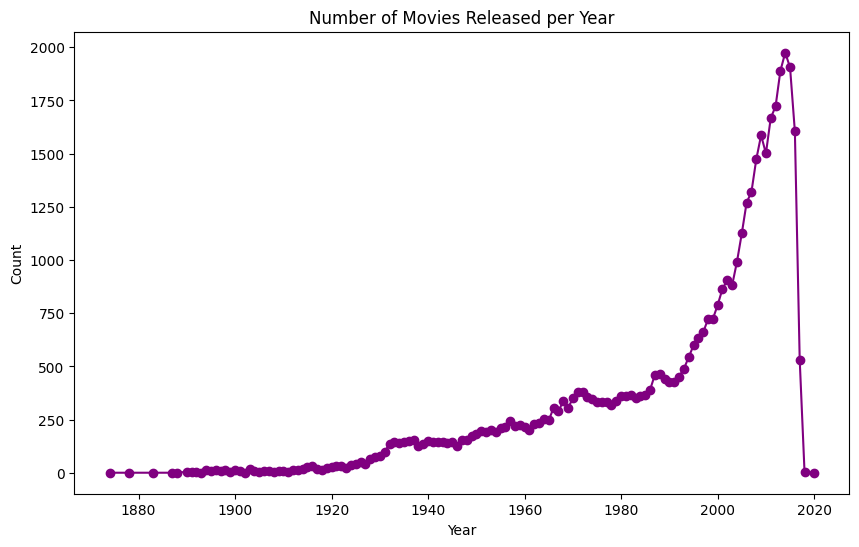

In [42]:
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year

yearly_counts = movies_metadata['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o', color='purple')
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

## 3. Clean data


In [43]:
# Make a copy for cleaning
df_netflix_clean = netflix_data.copy()

### **Quality Issue 1: missing data**

for the missing data will be imputing the director, cast and country with unknown as its not totally relevent to the research questions and removing these rows would cause a huge loss to the dataset 

In [45]:
df_netflix_clean['director'].fillna('Unknown', inplace=True)
df_netflix_clean['cast'].fillna('Unknown', inplace=True)
df_netflix_clean['country'].fillna('Unknown', inplace=True)

the date is considerably important for the analysis and the number of missing dates isn't igh so will be removing them 

both duration and rating missing rows are to deleted as well 

In [46]:
df_netflix_clean = df_netflix_clean.dropna(subset=['date_added'])
df_netflix_clean = df_netflix_clean.dropna(subset=['rating'])
df_netflix_clean = df_netflix_clean.dropna(subset=['duration'])

we can see missing values in director, cast, country, and date_added columns, loss of critical values could severly affect the analysis (quality issue)   

as we can see the data is has no missing values now 

In [47]:
print(df_netflix_clean.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


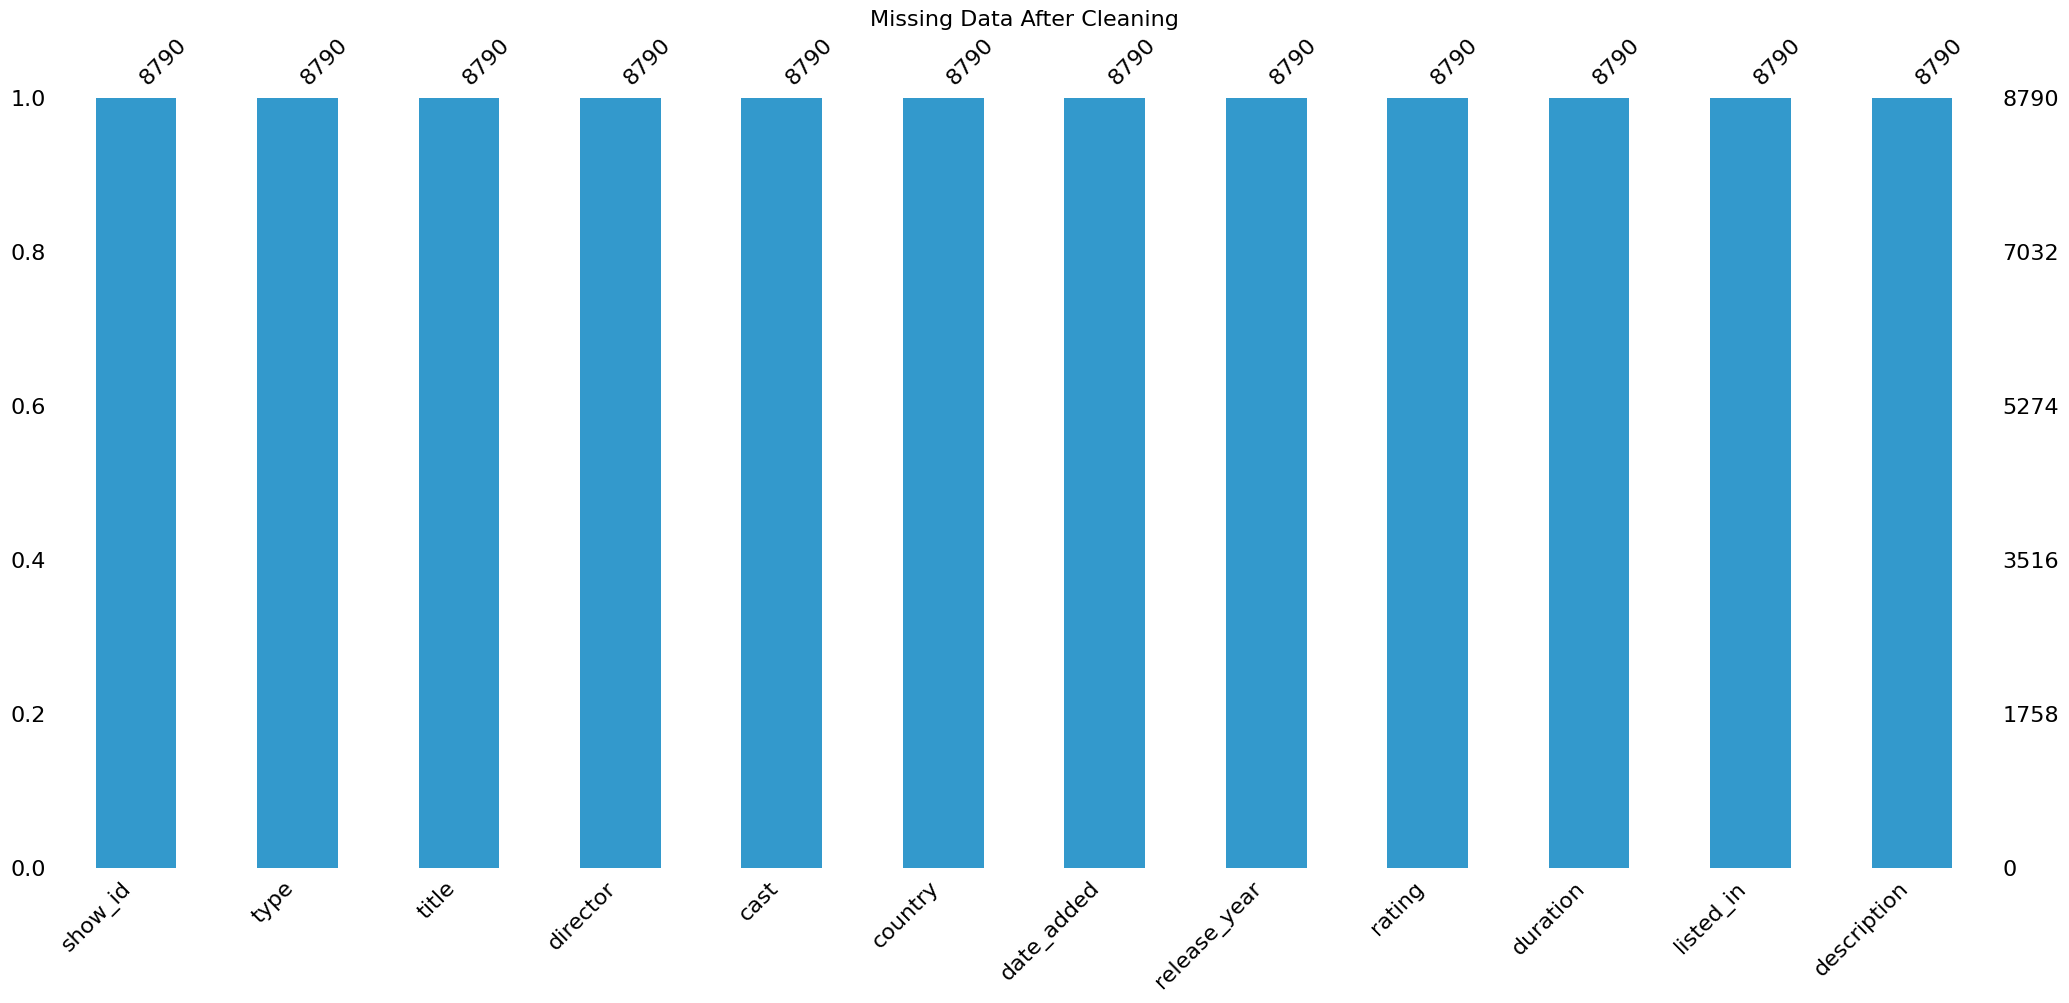

In [48]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
msno.bar(df_netflix_clean, color=(0.2, 0.6, 0.8))
plt.title("Missing Data After Cleaning", fontsize=16)
plt.show()


### **Quality Issue 2: conflicting values**

in this case we could either impute with unknown or most common value but this could intreduce bias which isnt good, so the best approach is removing these rows considering that its only 4 records which is a very small percentage from the whole dataset

In [49]:
ratings_to_remove = ['74 min', '84 min', '66 min']

df_netflix_clean = netflix_data[~netflix_data['rating'].isin(ratings_to_remove)]

as shown data is clean now and related

In [50]:
print(df_netflix_clean['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


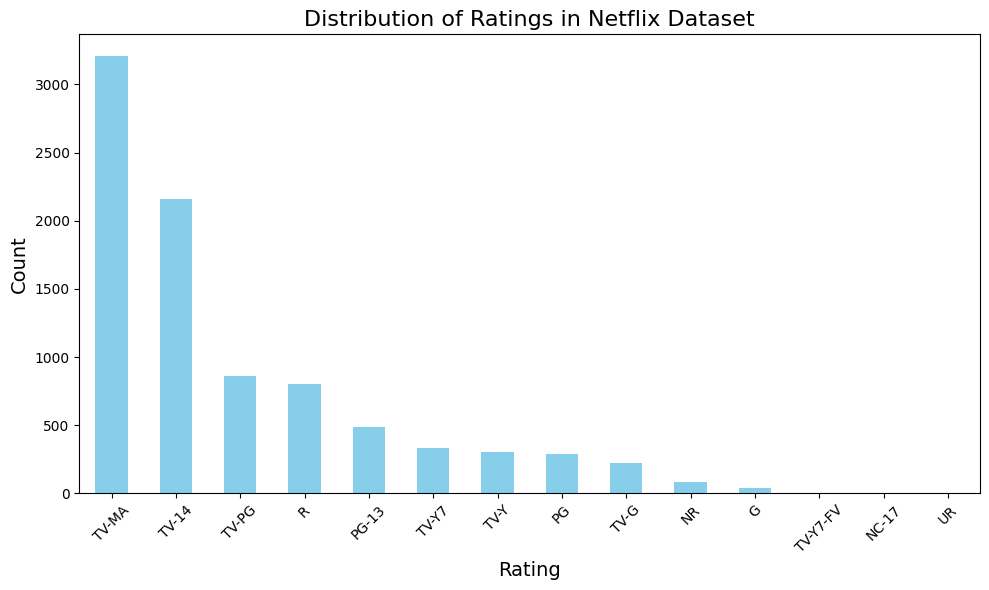

In [51]:
rating_counts = df_netflix_clean['rating'].value_counts()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Ratings in Netflix Dataset", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Tidiness Issue 1: conversion to datetime**

In [52]:
# strip from spaces
df_netflix_clean['date_added'] = df_netflix_clean['date_added'].str.strip()
# convert to datetime
df_netflix_clean['date_added'] = pd.to_datetime(df_netflix_clean['date_added'], format="%B %d, %Y", errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_11712\20974780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_clean['date_added'] = df_netflix_clean['date_added'].str.strip()
C:\Users\USER\AppData\Local\Temp\ipykernel_11712\20974780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_clean['date_added'] = pd.to_datetime(df_netflix_clean['date_added'], format="%B %d, %Y", errors='coerce')


as shwon the dates are now in the ISO format (YYYY-MM-DD), which confirms the conversion to datetime.

In [53]:
print(df_netflix_clean['date_added'].value_counts())

date_added
2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: count, Length: 1714, dtype: int64


### **Tidiness Issue 2: FILL IN**

The best approach is to seperate the data into two seperate columns, but considering the research question the duration isn't related so the whole column will be removed 

In [54]:
df_netflix_clean = df_netflix_clean.drop(columns=['duration'])

In [55]:
print(netflix_data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
